In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, mean_absolute_error, r2_score, roc_curve, auc, roc_auc_score
from plotly.subplots import make_subplots

#Lectura del dataset

In [227]:
URL = 'https://raw.githubusercontent.com/Adrian-Cancino/DataScience/refs/heads/main/Data/insurance.csv'

In [228]:
datos = pd.read_csv(URL)
datos

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Traducción de columnas

In [229]:
dict_columnas = {
    'age':'Edad',
    'sex':'Sexo',
    'bmi':'IMC',
    'children':'Hijos',
    'smoker':'Fumador',
    'region':'Region',
    'charges':'Cuota'
}

datos = datos.rename(columns=dict_columnas)
datos

,Edad,Sexo,IMC,Hijos,Fumador,Region,Cuota
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Doy una categoría binaria a las columnas Sexo y fumador

In [230]:
dict_Sexo = {
    'female': 0,
    'male': 1
}

datos['Sexo'] = datos['Sexo'].map(dict_Sexo)
datos

,Edad,Sexo,IMC,Hijos,Fumador,Region,Cuota
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [231]:
dict_Fumador = {
    'no': 0,
    'yes': 1
}

datos['Fumador'] = datos['Fumador'].map(dict_Fumador)
datos

,Edad,Sexo,IMC,Hijos,Fumador,Region,Cuota
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


#Realizo Análisis Exploratorio del Dataset

In [232]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Edad     1338 non-null   int64  
 1   Sexo     1338 non-null   int64  
 2   IMC      1338 non-null   float64
 3   Hijos    1338 non-null   int64  
 4   Fumador  1338 non-null   int64  
 5   Region   1338 non-null   object 
 6   Cuota    1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [233]:
datos.isnull().sum()

,0
Edad,0
Sexo,0
IMC,0
Hijos,0
Fumador,0
Region,0
Cuota,0


In [234]:
datos.describe()

,Edad,Sexo,IMC,Hijos,Fumador,Cuota
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [235]:
datos_copy = datos.copy()
datos_copy

,Edad,Sexo,IMC,Hijos,Fumador,Region,Cuota
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [236]:
matrix_corr2 = datos_copy.drop('Region', axis=1).corr()
matrix_corr2

,Edad,Sexo,IMC,Hijos,Fumador,Cuota
Edad,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
Sexo,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
IMC,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
Hijos,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
Fumador,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
Cuota,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [237]:
fig = px.imshow(matrix_corr2, height=650, aspect='auto', text_auto=True)
fig.update_layout(title='Matriz de correlación')
fig.show()

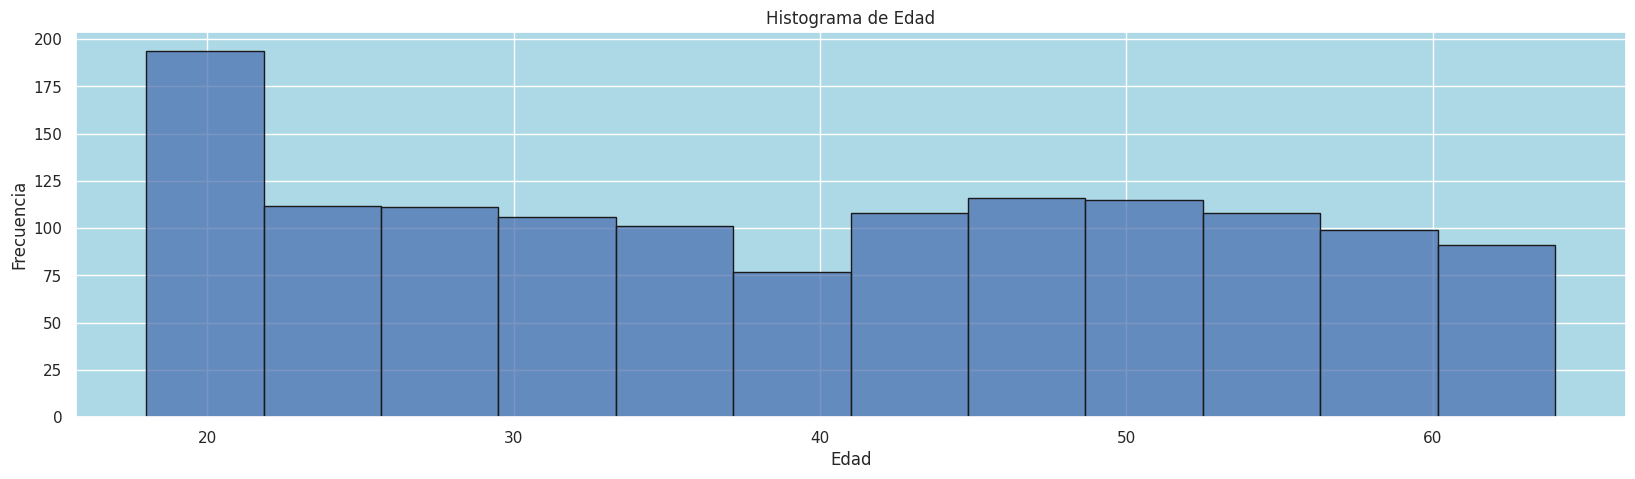

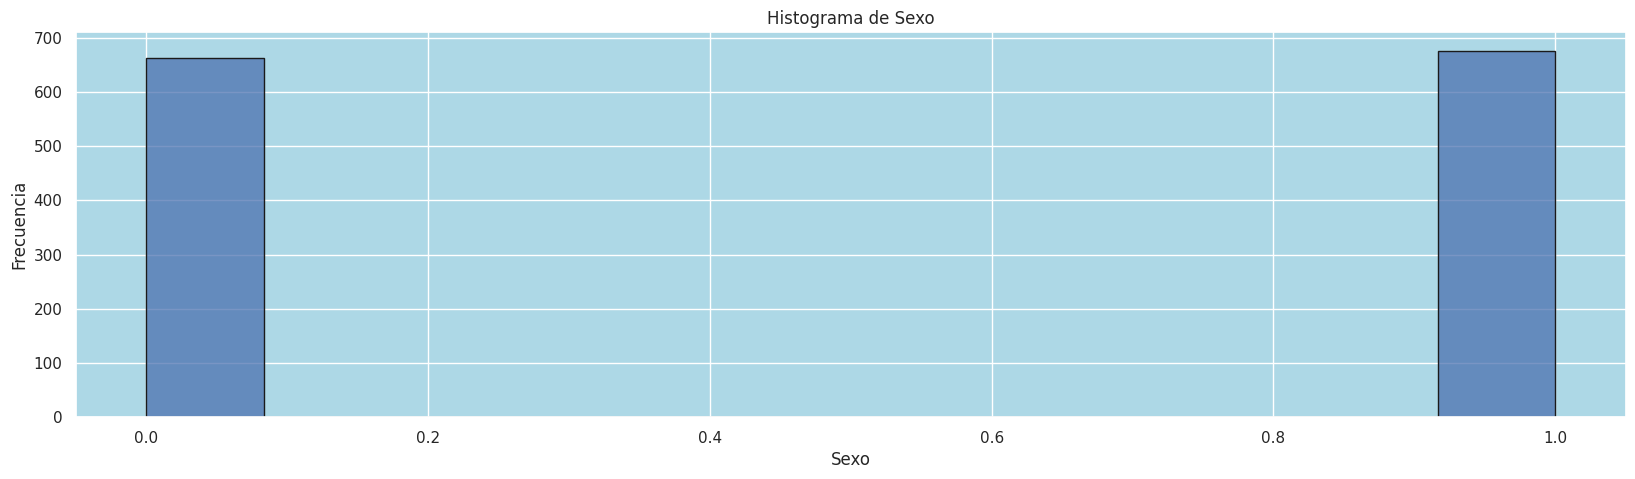

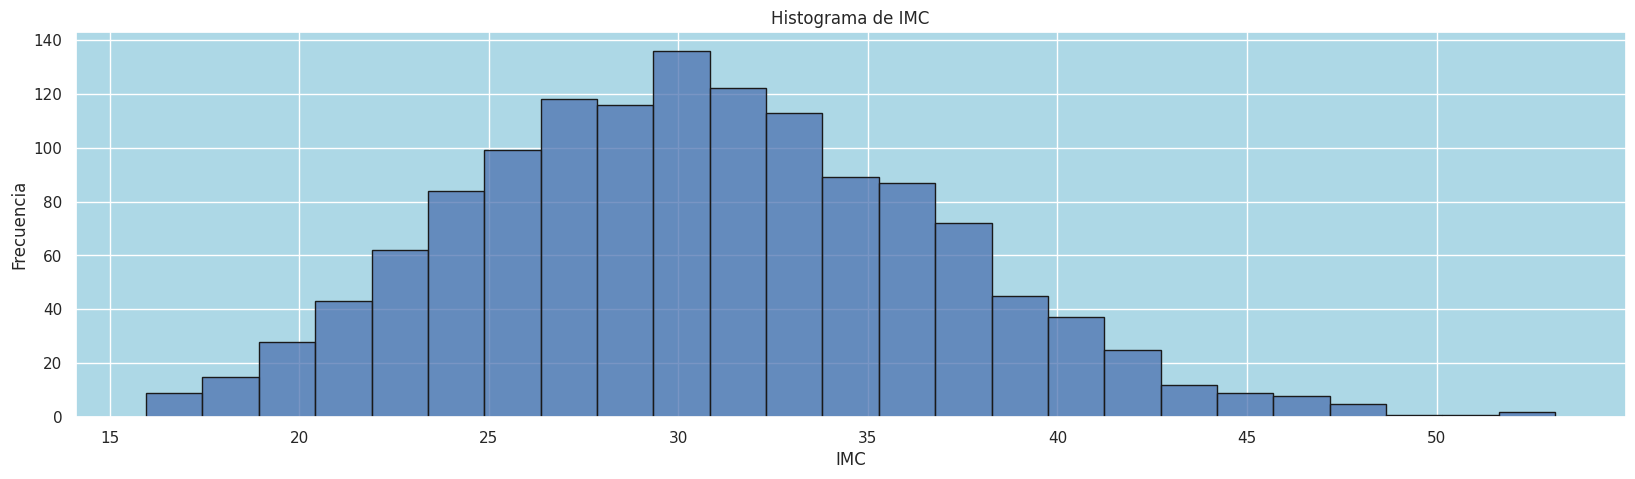

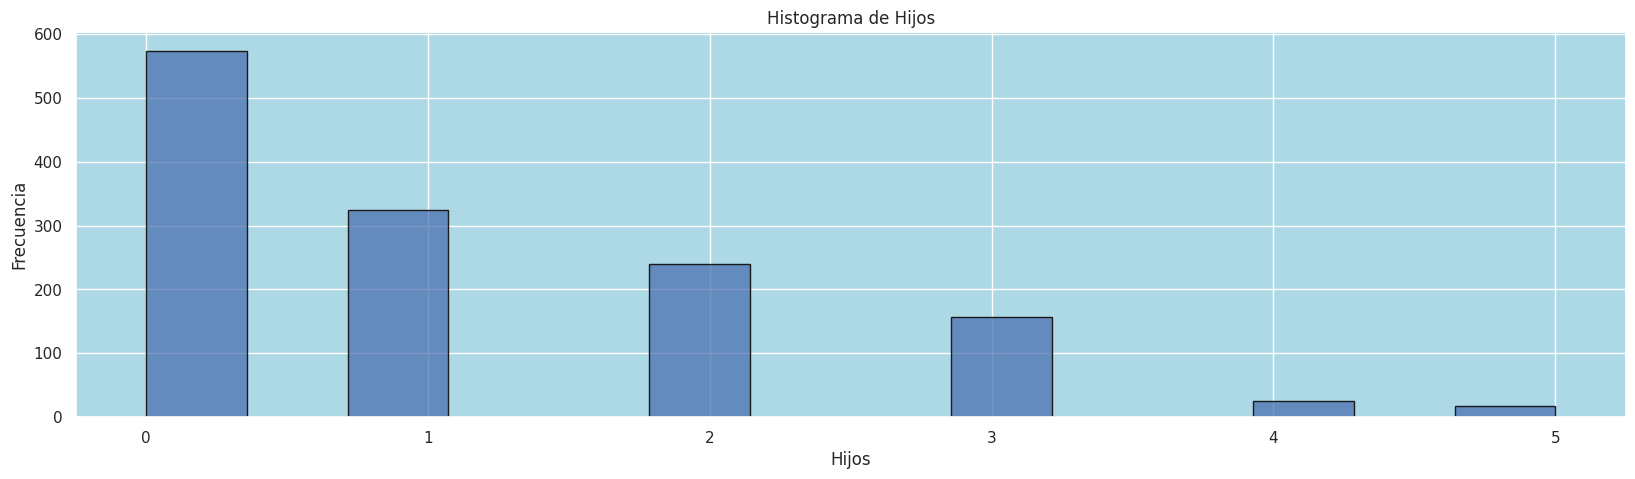

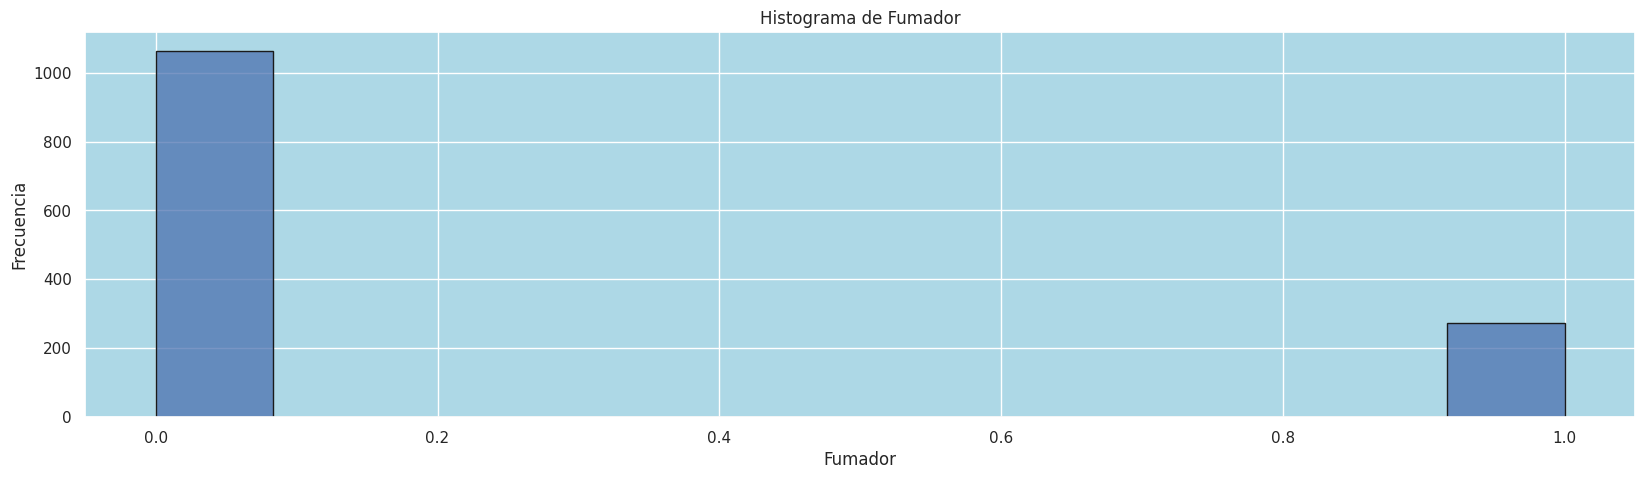

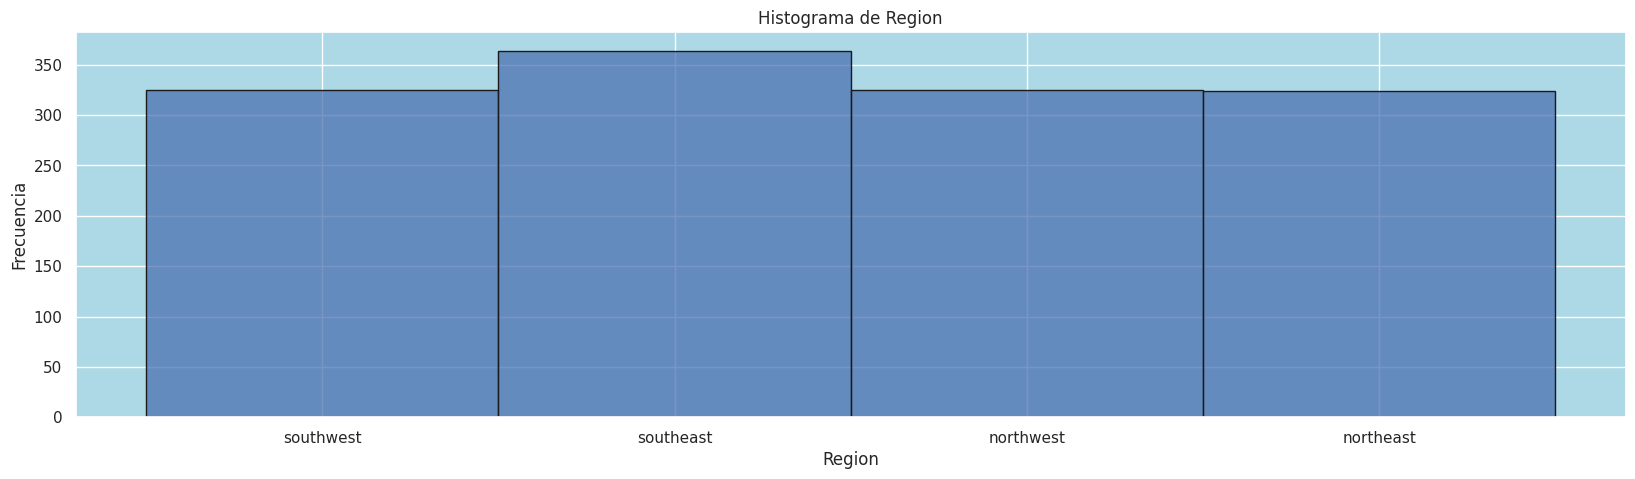

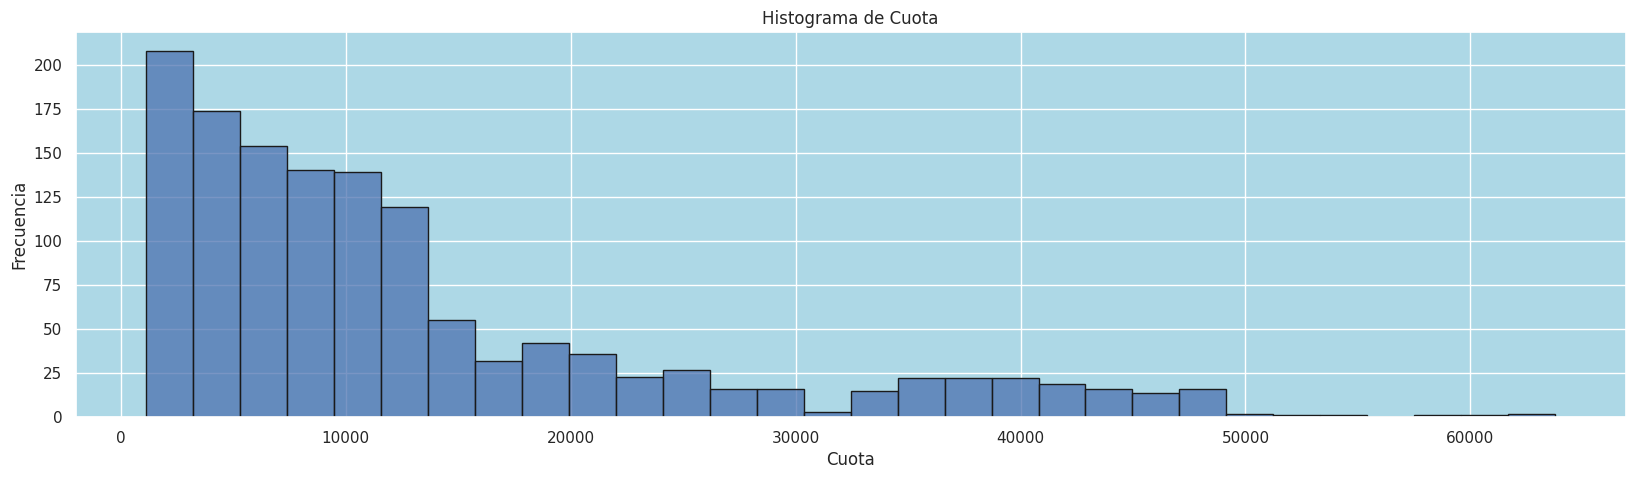

In [238]:
for col in datos.columns:
  sns.set_style('darkgrid')
  sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
  plt.figure(figsize=(20,5))
  sns.histplot(datos[col], edgecolor='k')
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [239]:
for col in datos.columns:
  fig = px.histogram(datos, x=col)
  fig.update_layout(title=f'Histograma de {col}')
  fig.update_yaxes(title_text='Frecuencia')
  fig.show()

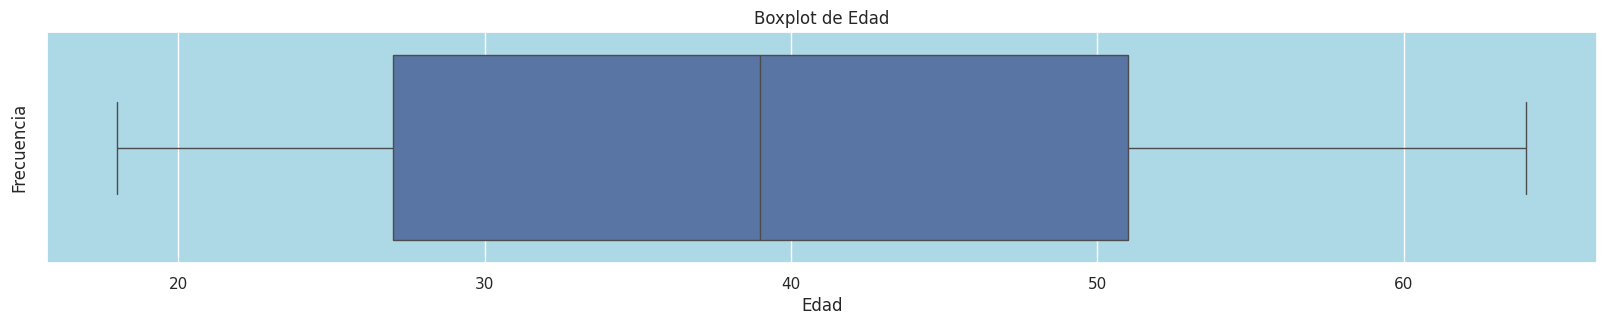

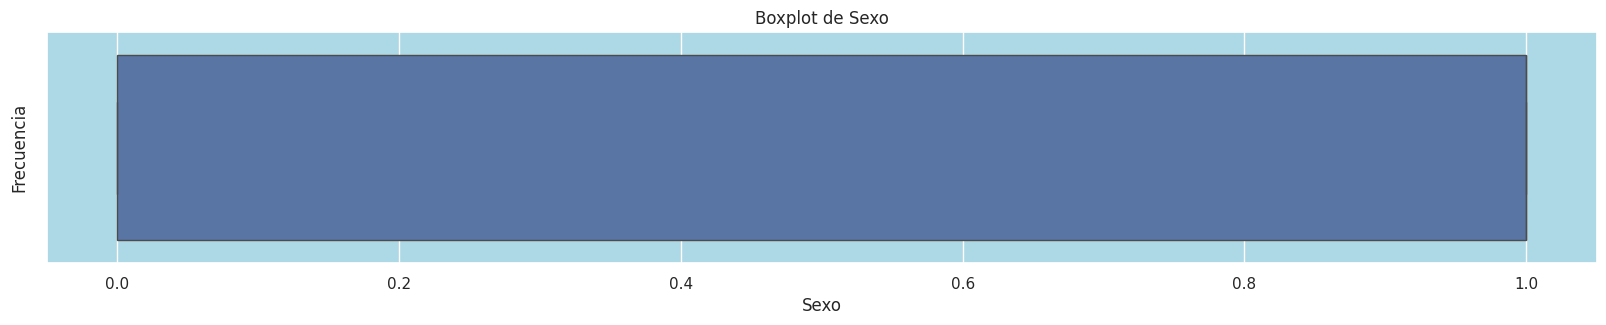

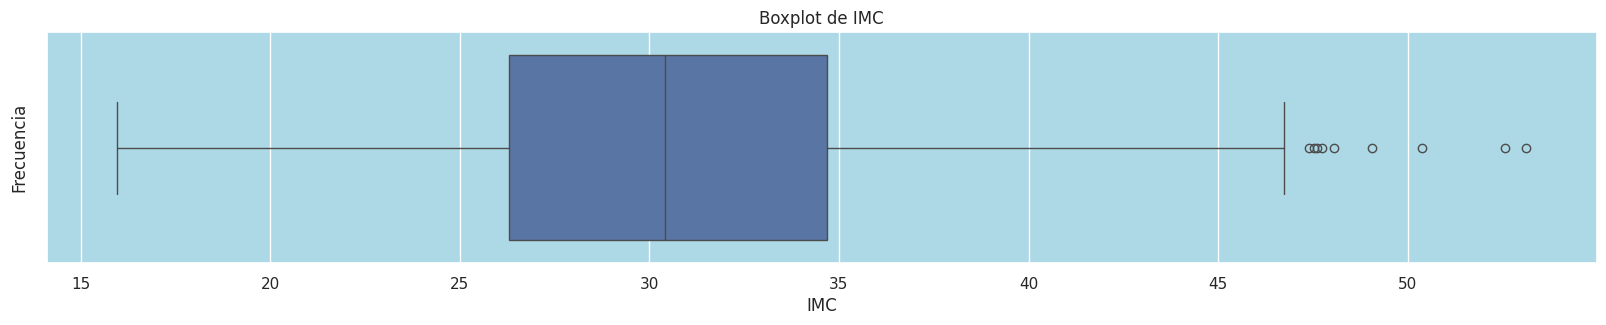

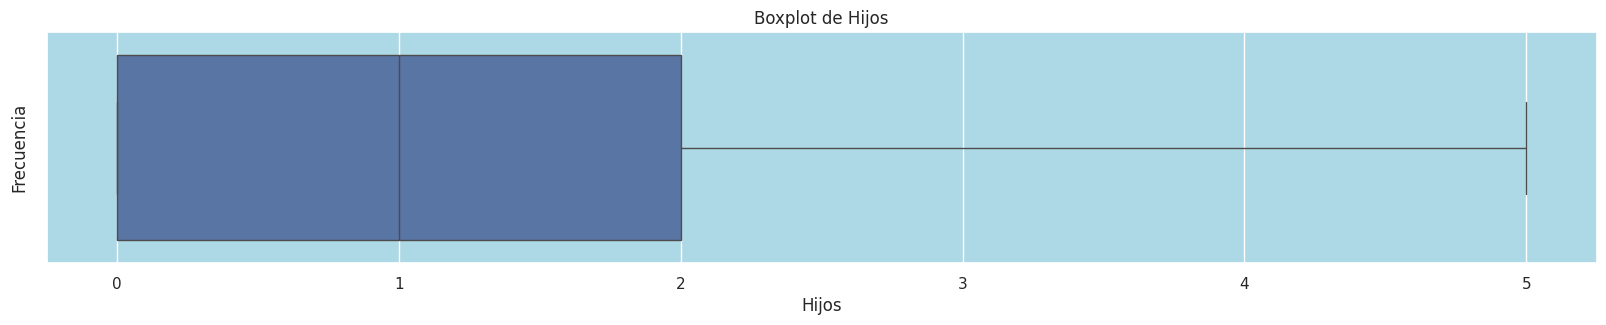

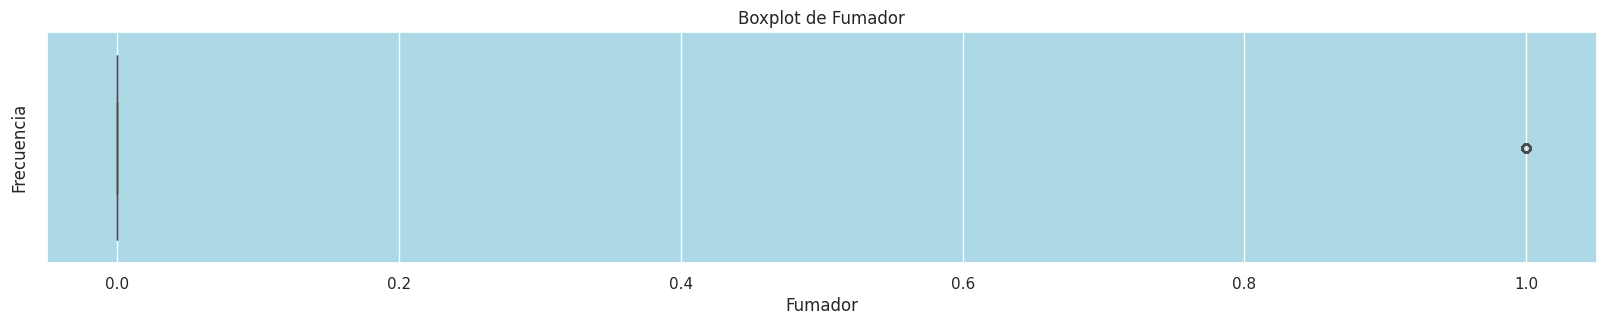

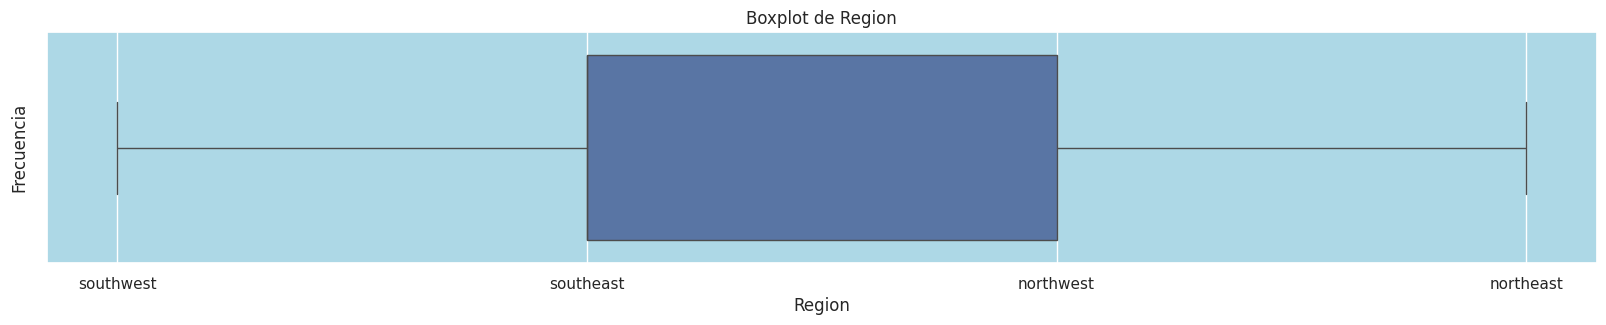

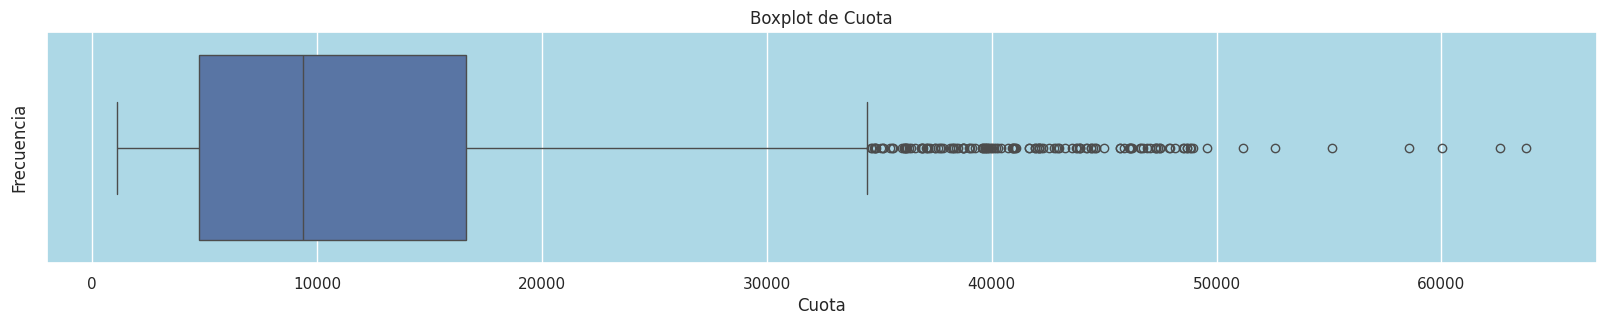

In [240]:
for col in datos.columns:
  sns.set_style('darkgrid')
  sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
  plt.figure(figsize=(20,3))
  sns.boxplot(datos[col], orient='h')
  plt.title(f'Boxplot de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [241]:
for col in datos.columns:
  fig = px.box(datos, y=col)
  fig.update_layout(title=f'Boxplot de {col}')
  fig.show()

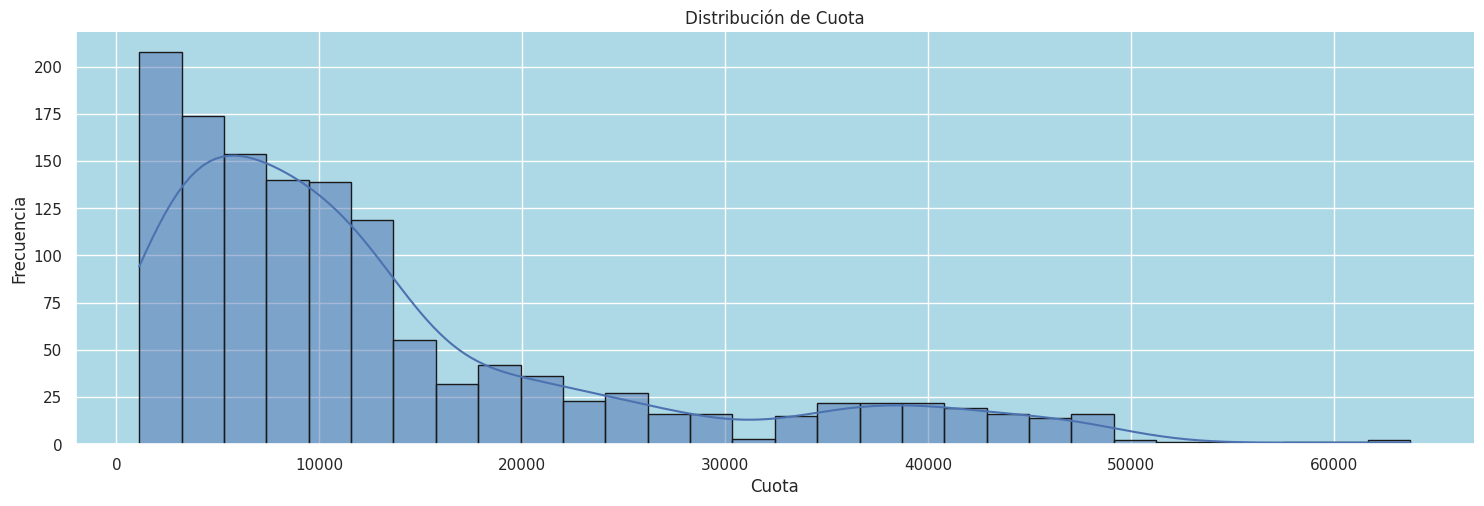

In [242]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
sns.displot(datos['Cuota'], kde=True, edgecolor='k', height=5, aspect=3)
plt.title('Distribución de Cuota')
plt.xlabel('Cuota')
plt.ylabel('Frecuencia')
plt.show()

In [243]:
fig = px.histogram(datos_copy, x='Cuota')
fig.update_layout(title='Distribución de Cuota')
fig.update_yaxes(title_text='Frecuencia')
fig.show()

In [244]:
datos_copy['Cuota'] = np.log10(datos_copy['Cuota'])
datos_copy

,Edad,Sexo,IMC,Hijos,Fumador,Region,Cuota
0,19,0,27.900,0,1,southwest,4.227499
1,18,1,33.770,1,0,southeast,3.236928
2,28,1,33.000,3,0,southeast,3.648308
3,33,1,22.705,0,0,northwest,4.342116
4,32,1,28.880,0,0,northwest,3.587358
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,4.025328
1334,18,0,31.920,0,0,northeast,3.343602
1335,18,0,36.850,0,0,southeast,3.212143
1336,21,0,25.800,0,0,southwest,3.302752


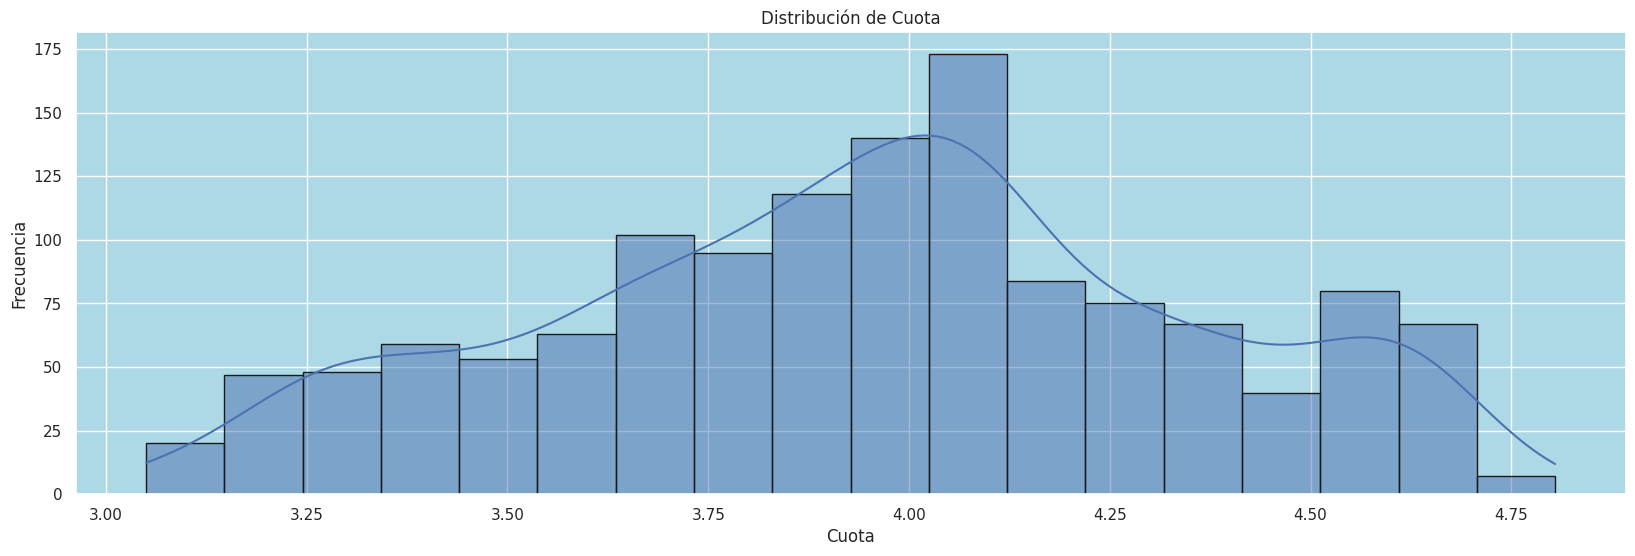

In [245]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.histplot(datos_copy['Cuota'], kde=True, edgecolor='k')
plt.title('Distribución de Cuota')
plt.xlabel('Cuota')
plt.ylabel('Frecuencia')
plt.show()

In [246]:
for col in datos_copy.columns:
  fig = px.histogram(datos_copy, x=col)
  fig.update_layout(title=f'Histograma de {col}')
  fig.update_yaxes(title_text='Frecuencia')
  fig.show()

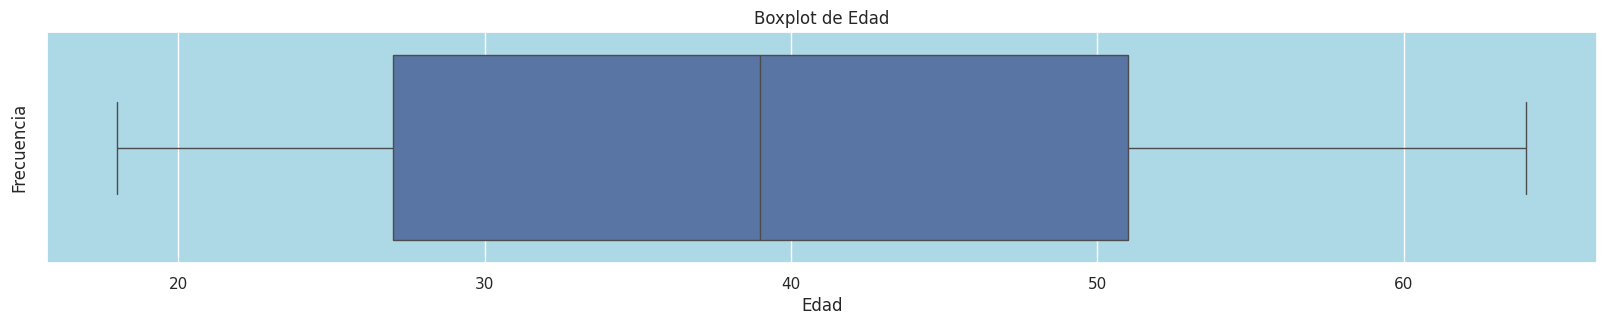

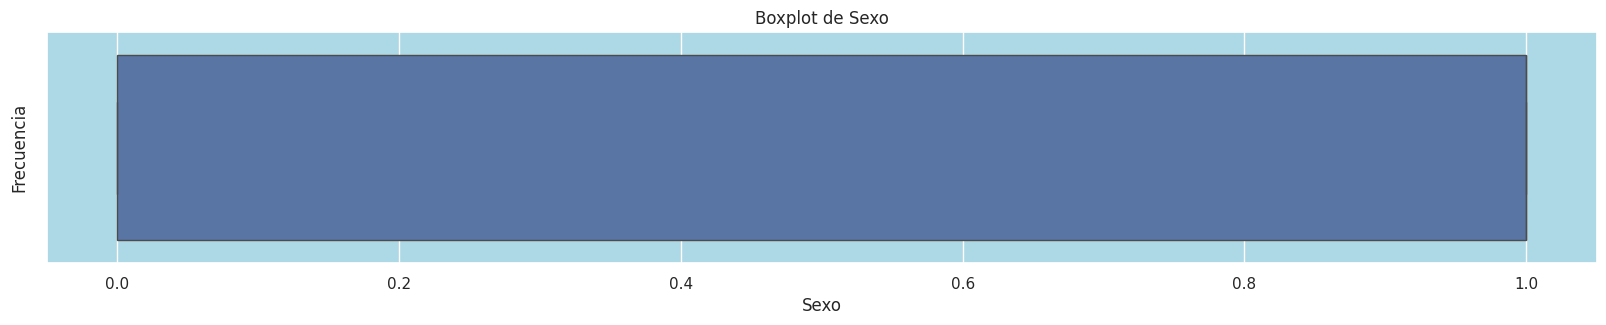

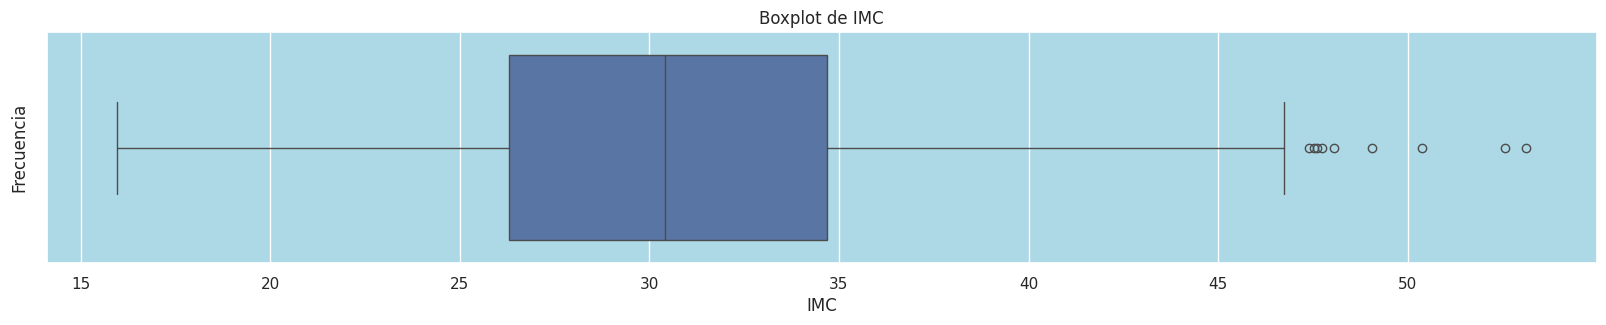

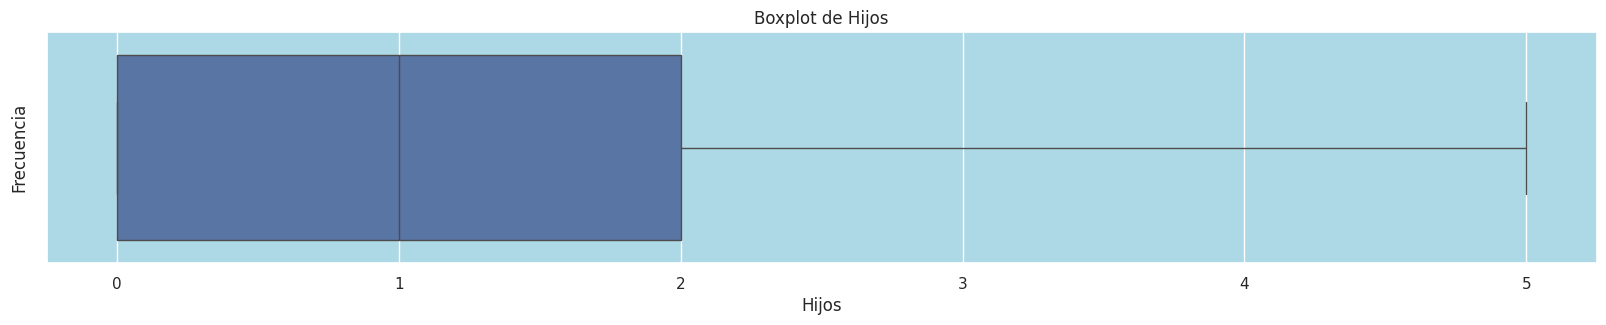

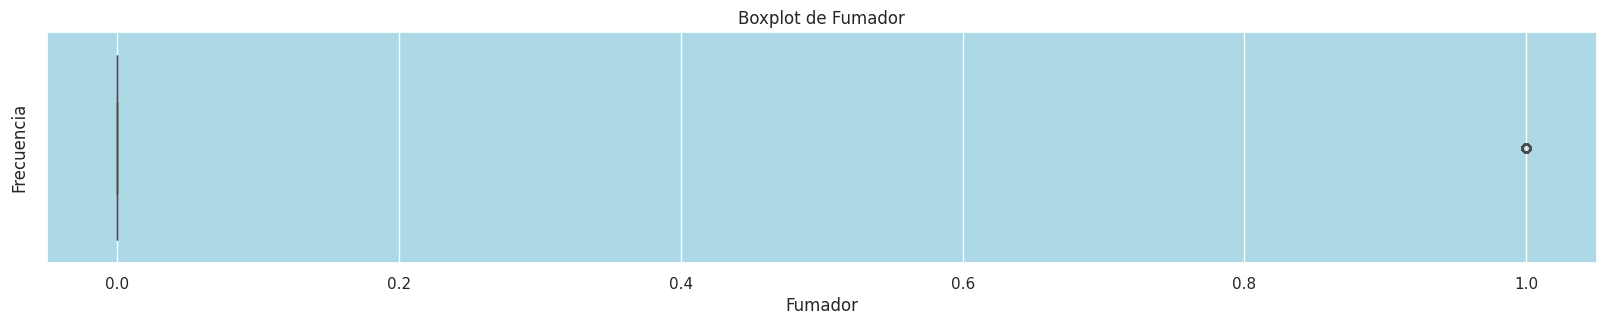

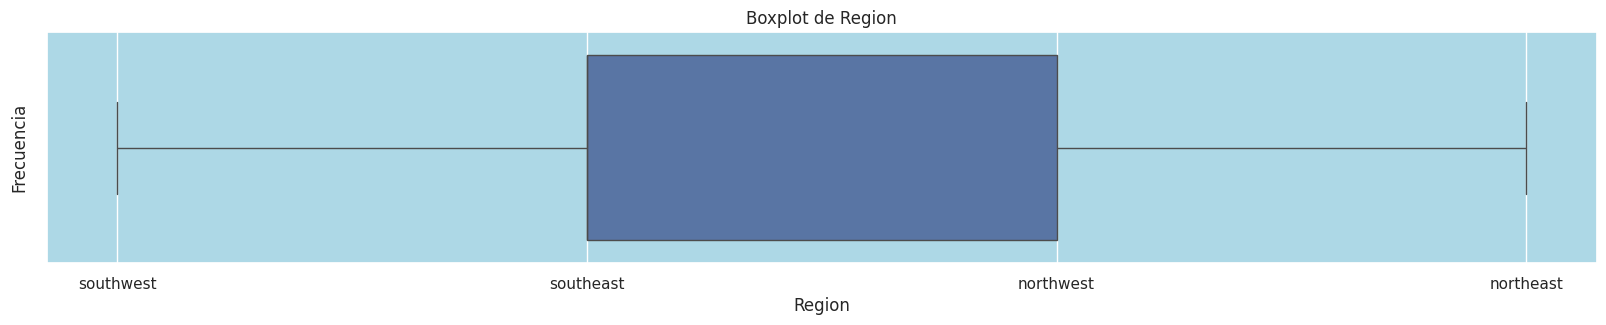

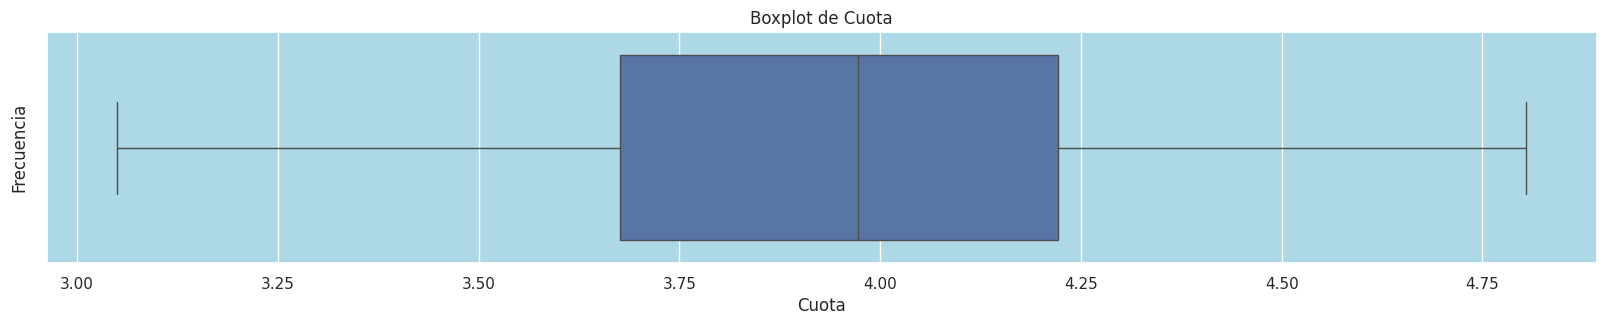

In [247]:
for col in datos.columns:
  sns.set_style('darkgrid')
  sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
  plt.figure(figsize=(20,3))
  sns.boxplot(datos_copy[col], orient='h')
  plt.title(f'Boxplot de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

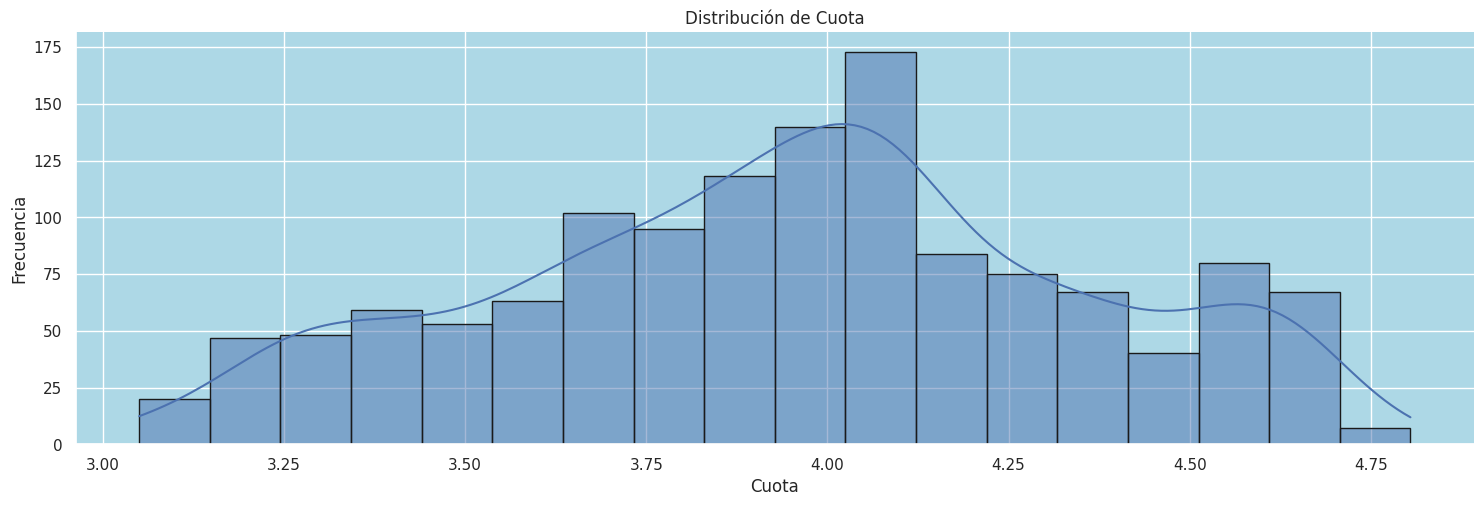

In [248]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
sns.displot(datos_copy['Cuota'], kde=True, edgecolor='k', height=5, aspect=3)
plt.title('Distribución de Cuota')
plt.xlabel('Cuota')
plt.ylabel('Frecuencia')
plt.show()

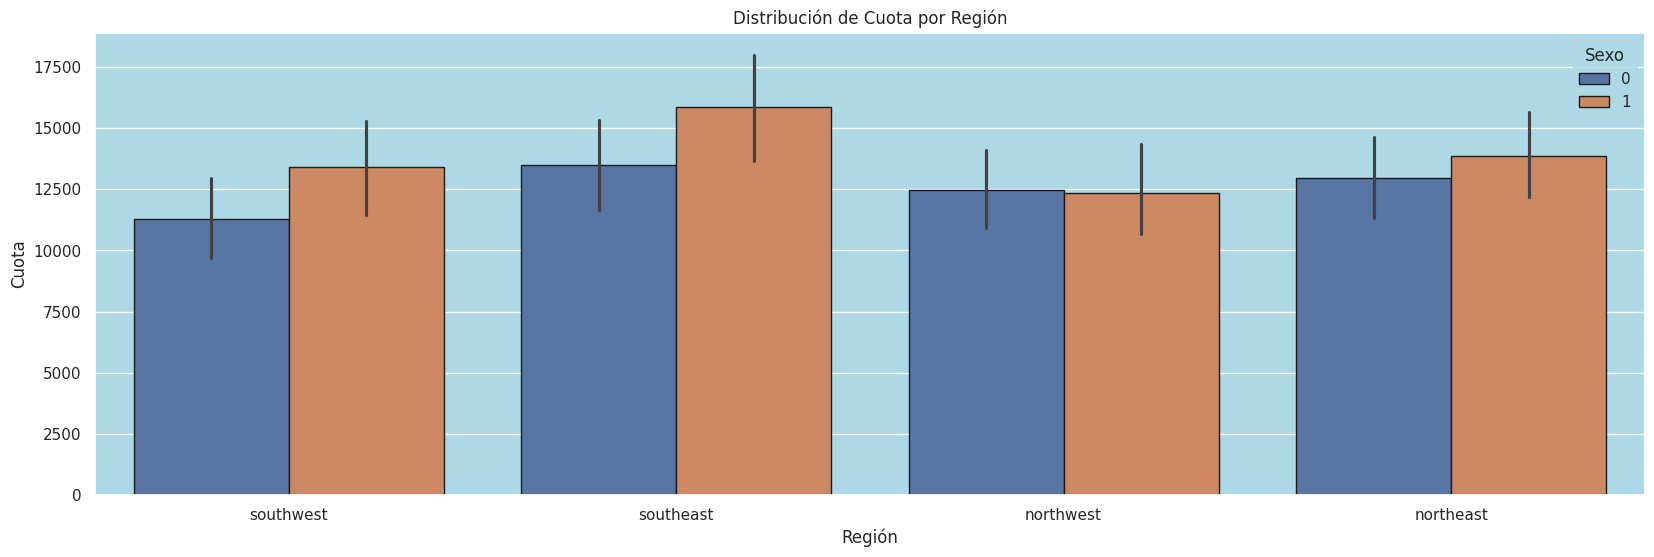

In [249]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.barplot(x='Region', y='Cuota', hue='Sexo', data=datos, edgecolor='k')
plt.title('Distribución de Cuota por Región')
plt.xlabel('Región')
plt.ylabel('Cuota')
plt.show()

In [250]:
datos_grupo_cuota_region_por_sexo = datos.groupby(['Region', 'Sexo'])['Cuota'].mean().reset_index()
datos_grupo_cuota_region_por_sexo

,Region,Sexo,Cuota
0,northeast,0,12953.203151
1,northeast,1,13854.005374
2,northwest,0,12479.870397
3,northwest,1,12354.119575
4,southeast,0,13499.669243
5,southeast,1,15879.617173
6,southwest,0,11274.411264
7,southwest,1,13412.883576


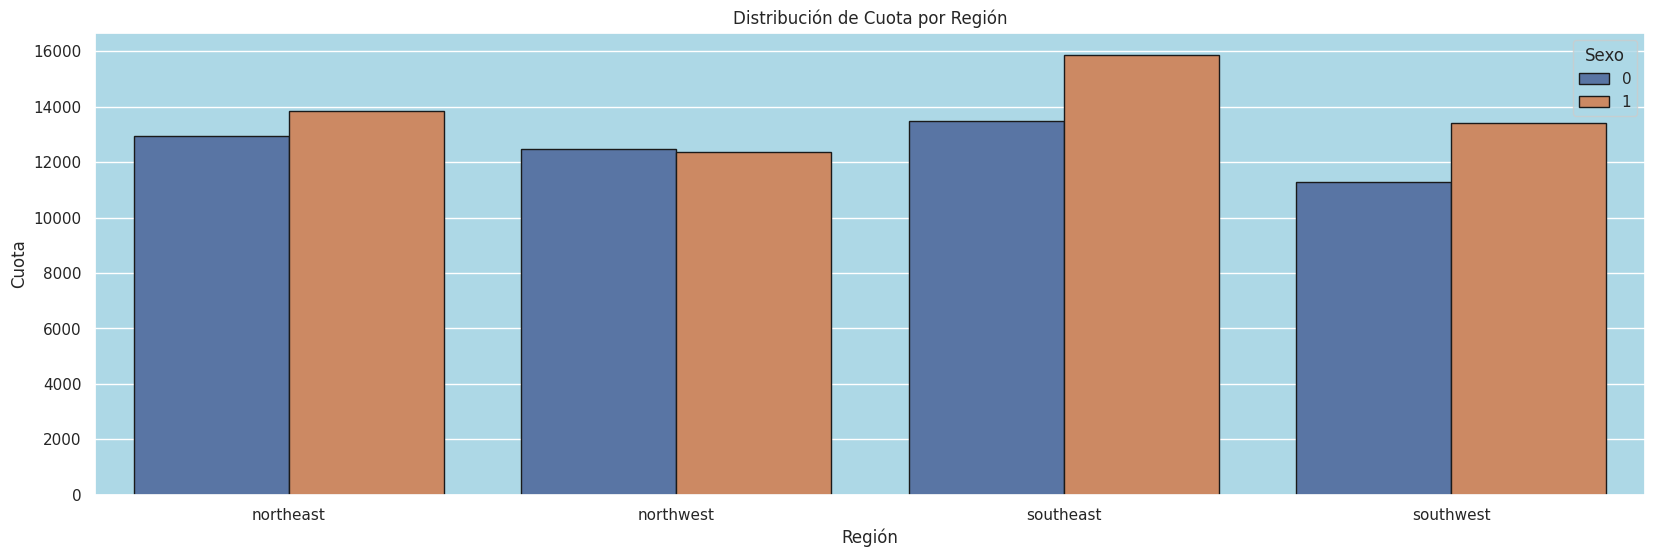

In [251]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.barplot(x='Region', y='Cuota', hue='Sexo', data=datos_grupo_cuota_region_por_sexo, edgecolor='k')
plt.title('Distribución de Cuota por Región')
plt.xlabel('Región')
plt.ylabel('Cuota')
plt.show()

In [252]:
fig = px.line(datos_grupo_cuota_region_por_sexo, x='Region', y='Cuota', color='Sexo')
fig.update_layout(title='Distribución de Cuota por Región y Sexo')
fig.update_xaxes(title_text='Región')
fig.update_yaxes(title_text='Cuota')
fig.show()

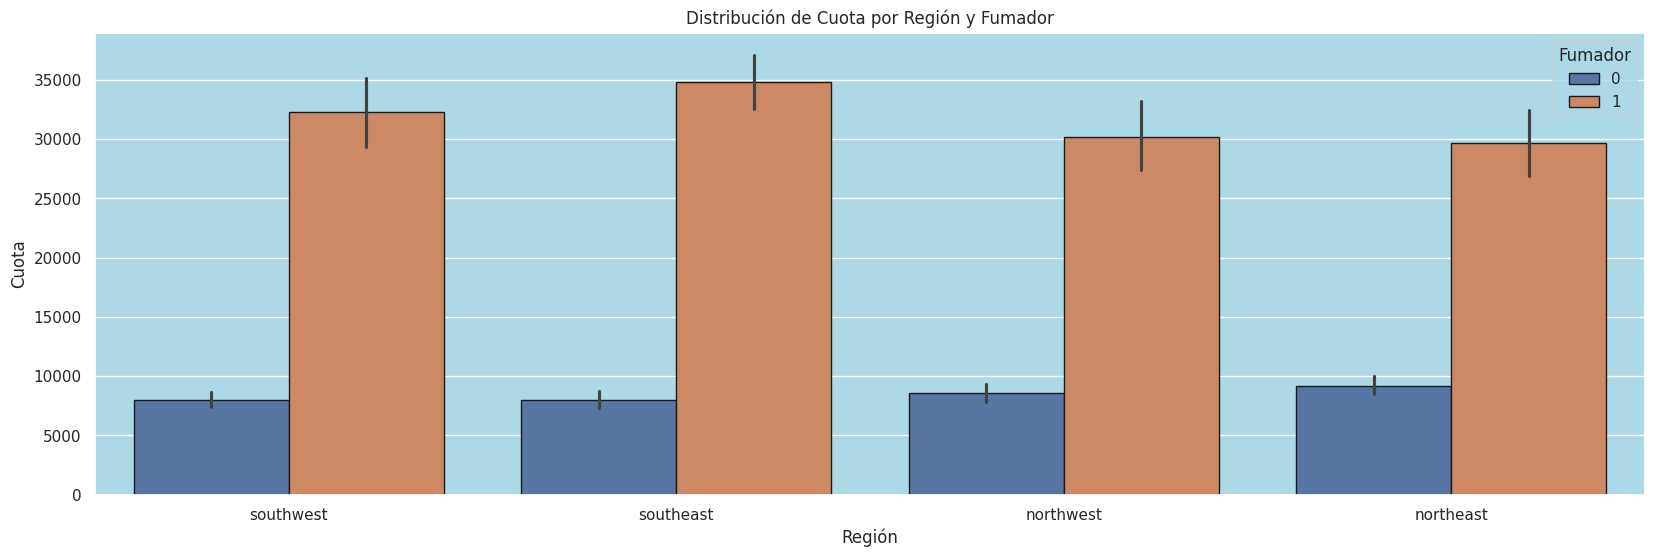

In [253]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.barplot(x='Region', y='Cuota', hue='Fumador', data=datos, edgecolor='k')
plt.title('Distribución de Cuota por Región y Fumador')
plt.xlabel('Región')
plt.ylabel('Cuota')
plt.show()

In [254]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['Distribución de Cuota por Sexo', 'Distribución de Cuota por Fumador', 'Distribución de Cuota por Edad'])
fig.add_trace(go.Histogram(x=datos[datos['Sexo'] == 0]['Cuota'], name='Sexo 0'), row=1, col=1)
fig.add_trace(go.Histogram(x=datos[datos['Sexo'] == 1]['Cuota'], name='Sexo 1'), row=1, col=1)
fig.add_trace(go.Histogram(x=datos[datos['Fumador'] == 0]['Cuota'], name='Fumador'), row=1, col=2)
fig.add_trace(go.Histogram(x=datos[datos['Fumador'] == 1]['Cuota'], name='No Fumador'), row=1, col=2)
fig.add_trace(go.Histogram(x=datos[datos['Edad'] < 30]['Cuota'], name='Edad < 30'), row=1, col=3)
fig.add_trace(go.Histogram(x=datos[(datos['Edad'] >= 30) & (datos['Edad'] < 60)]['Cuota'], name='30-60'), row=1, col=3)
fig.add_trace(go.Histogram(x=datos[datos['Edad'] >= 60]['Cuota'], name='Edad > 60'), row=1, col=3)
fig.update_layout(title='Distribución de Cuota por Sexo, Fumador y Edad')
fig.update_xaxes(title_text='Cuota', row=1, col=1)
fig.update_xaxes(title_text='Cuota', row=1, col=2)
fig.update_xaxes(title_text='Cuota', row=1, col=3)
fig.update_yaxes(title_text='Frecuencia', row=1, col=1)
fig.update_yaxes(title_text='Frecuencia', row=1, col=2)
fig.update_yaxes(title_text='Frecuencia', row=1, col=3)
fig.show()

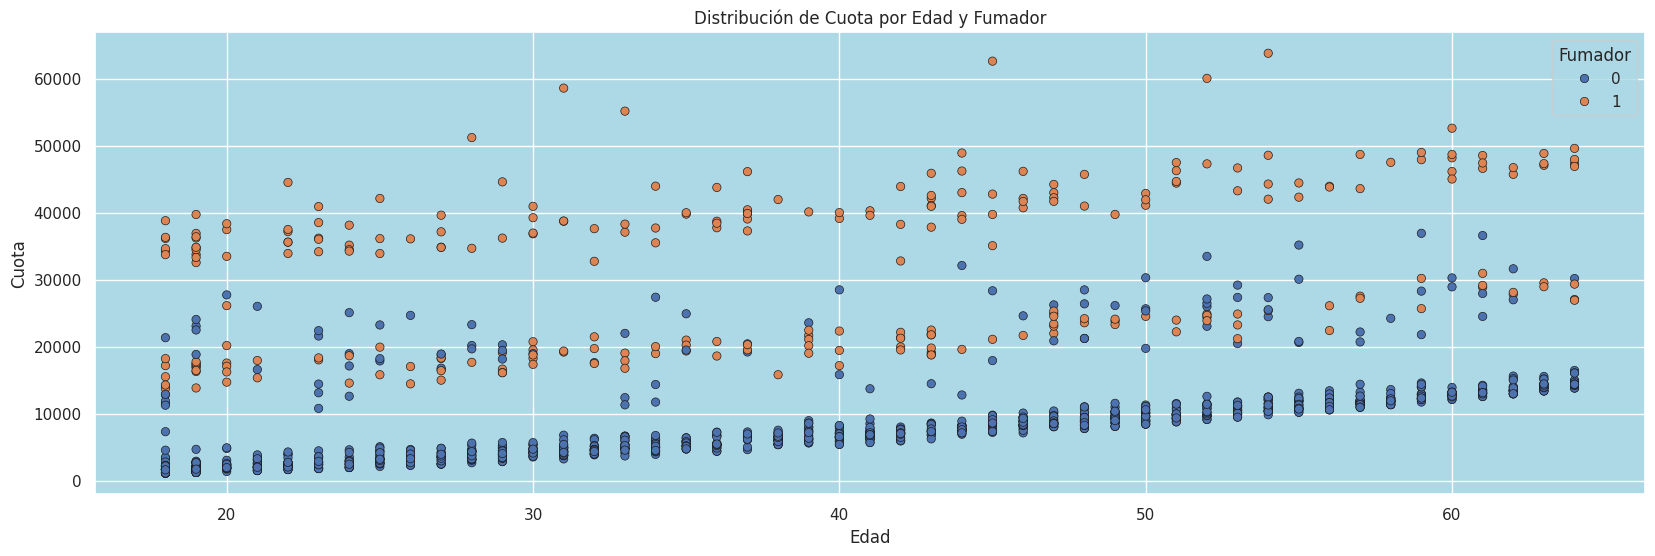

In [255]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.scatterplot(x='Edad', y='Cuota', hue='Fumador', data=datos, edgecolor='k')
plt.title('Distribución de Cuota por Edad y Fumador')
plt.xlabel('Edad')
plt.ylabel('Cuota')
plt.show()

In [256]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribución de Cuota por Edad - fumador o no fumador', 'Distribución de Cuota por IMC - fumador o no fumador'])
fig.add_trace(go.Scatter(x=datos[datos['Fumador'] == 0]['Edad'], y=datos[datos['Fumador'] == 0]['Cuota'], mode='markers', name='Fumador'), row=1, col=1)
fig.add_trace(go.Scatter(x=datos[datos['Fumador'] == 1]['Edad'], y=datos[datos['Fumador'] == 1]['Cuota'], mode='markers', name='No Fumador'), row=1, col=1)
fig.add_trace(go.Scatter(x=datos[datos['Fumador'] == 0]['IMC'], y=datos[datos['Fumador'] == 0]['Cuota'], mode='markers', name='Fumador'), row=1, col=2)
fig.add_trace(go.Scatter(x=datos[datos['Fumador'] == 1]['IMC'], y=datos[datos['Fumador'] == 1]['Cuota'], mode='markers', name='No Fumador'), row=1, col=2)
fig.update_layout(title='Distribución de Cuota por Edad e IMC Fumador o no fumador')
fig.update_xaxes(title_text='Edad', row=1, col=1)
fig.update_xaxes(title_text='IMC', row=1, col=2)
fig.update_yaxes(title_text='Cuota', row=1, col=1)
fig.update_yaxes(title_text='Cuota', row=1, col=2)
fig.show()

In [257]:
datos_encoded = pd.get_dummies(datos, columns=['Region'])
datos_encoded

,Edad,Sexo,IMC,Hijos,Fumador,Cuota,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


In [258]:
datos_copy_encoded = pd.get_dummies(datos, columns=['Region'])
datos_copy_encoded

,Edad,Sexo,IMC,Hijos,Fumador,Cuota,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


In [259]:
datos_encoded[['Region_northeast','Region_northwest','Region_southeast','Region_southwest']] = datos_encoded[['Region_northeast','Region_northwest','Region_southeast','Region_southwest']].astype(int)
datos_encoded.head()

,Edad,Sexo,IMC,Hijos,Fumador,Cuota,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [260]:
X = datos_encoded.drop('Cuota', axis=1).values
y = datos_encoded['Cuota'].values

In [261]:
from sklearn.preprocessing import StandardScaler

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [263]:
X_train

array([[46.   ,  0.   , 19.95 , ...,  1.   ,  0.   ,  0.   ],
       [47.   ,  0.   , 24.32 , ...,  0.   ,  0.   ,  0.   ],
       [52.   ,  0.   , 24.86 , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [58.   ,  1.   , 25.175, ...,  0.   ,  0.   ,  0.   ],
       [37.   ,  0.   , 47.6  , ...,  0.   ,  0.   ,  1.   ],
       [55.   ,  1.   , 29.9  , ...,  0.   ,  0.   ,  1.   ]])

In [264]:
X_test_scaled

array([[ 0.40114007, -1.0246016 , -0.89153925, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.23863782, -1.0246016 , -0.08946143, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 1.75178229, -1.0246016 , -0.60845296, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       ...,
       [-0.09646495,  0.97598911, -0.41972876, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 1.04091797, -1.0246016 ,  2.78941026, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       [ 0.82765867, -1.0246016 ,  0.60252728, ..., -0.56079971,
        -0.59966106,  1.74729228]])

In [265]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

In [266]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MAE: 4181.19
R2: 0.78


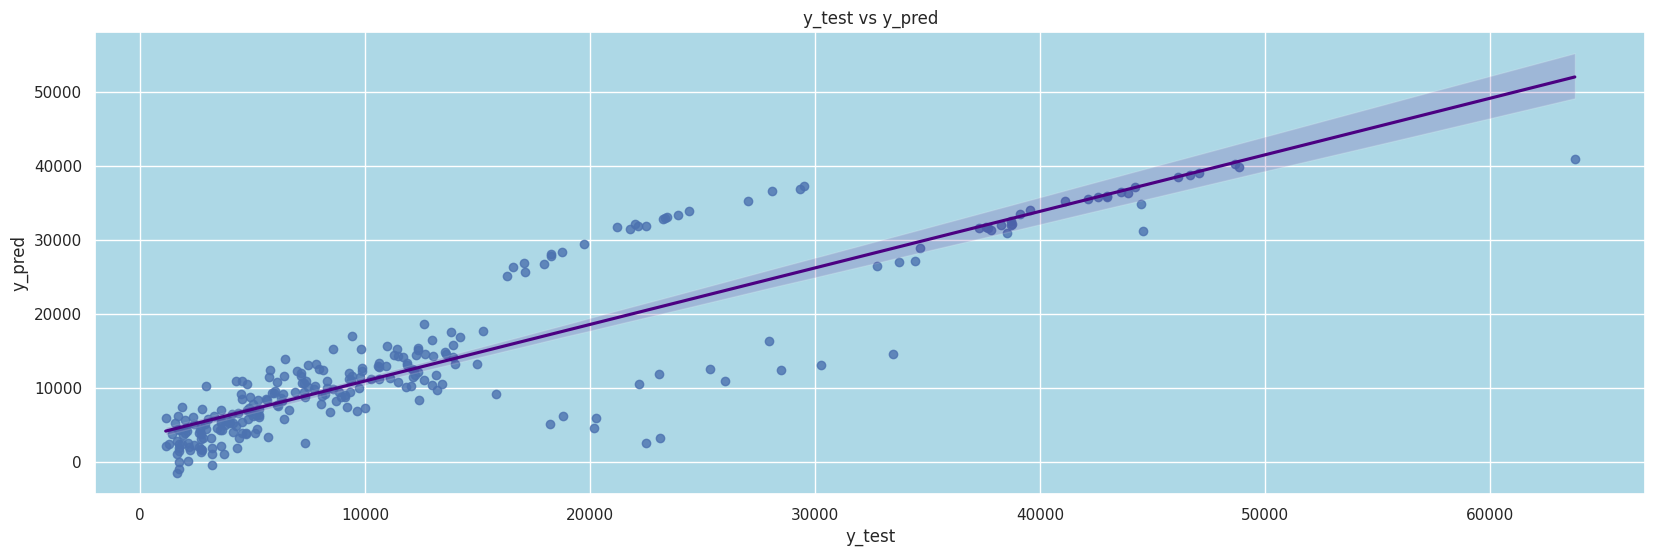

In [267]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'indigo'})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [268]:
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'y_test', 'y': 'y_pred'}, title='y_test vs y_pred')
fig.add_shape(
      type='line',
    x0=min(y_test),
    y0=min(y_test),
    x1=max(y_test),
    y1=max(y_test),

    line=dict(color='indigo', dash='solid')
)

fig.show()

In [269]:
datos_copy_encoded = pd.get_dummies(datos_copy, columns=['Region'], drop_first=True)


X = datos_copy_encoded.drop('Cuota', axis=1).values
y = datos_copy_encoded['Cuota'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MAE: 0.12
R2: 0.80


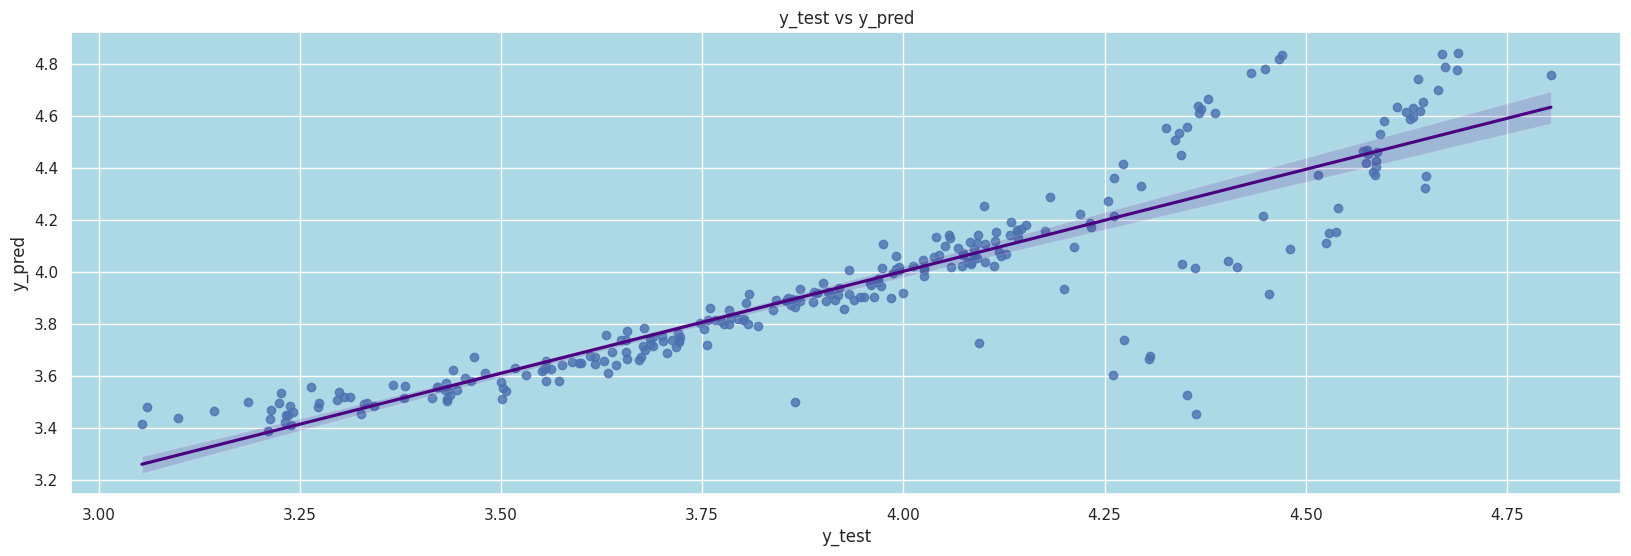

In [270]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'indigo'})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [271]:
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'y_test', 'y': 'y_pred'}, title='y_test vs y_pred')
fig.add_shape(
      type='line',
    x0=min(y_test),
    y0=min(y_test),
    x1=max(y_test),
    y1=max(y_test),
    line=dict(color='indigo', dash='solid')
)

fig.show()

In [272]:
from sklearn.svm import SVR

In [278]:
datos = pd.read_csv(URL)
datos = datos.rename(columns=dict_columnas)
dict_Sexo = {
    'female': 0,
    'male': 1
}

datos['Sexo'] = datos['Sexo'].map(dict_Sexo)


#Convert 'Smoker' column to numerical using map before creating dummies
dict_Fumador = {
    'no': 0,
    'yes': 1
}

datos['Fumador'] = datos['Fumador'].map(dict_Fumador)
datos= pd.get_dummies(datos, columns=['Region'], drop_first=True)
X = datos.drop('Cuota', axis=1).values
y = datos['Cuota'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MAE: 8612.41
R2: -0.07


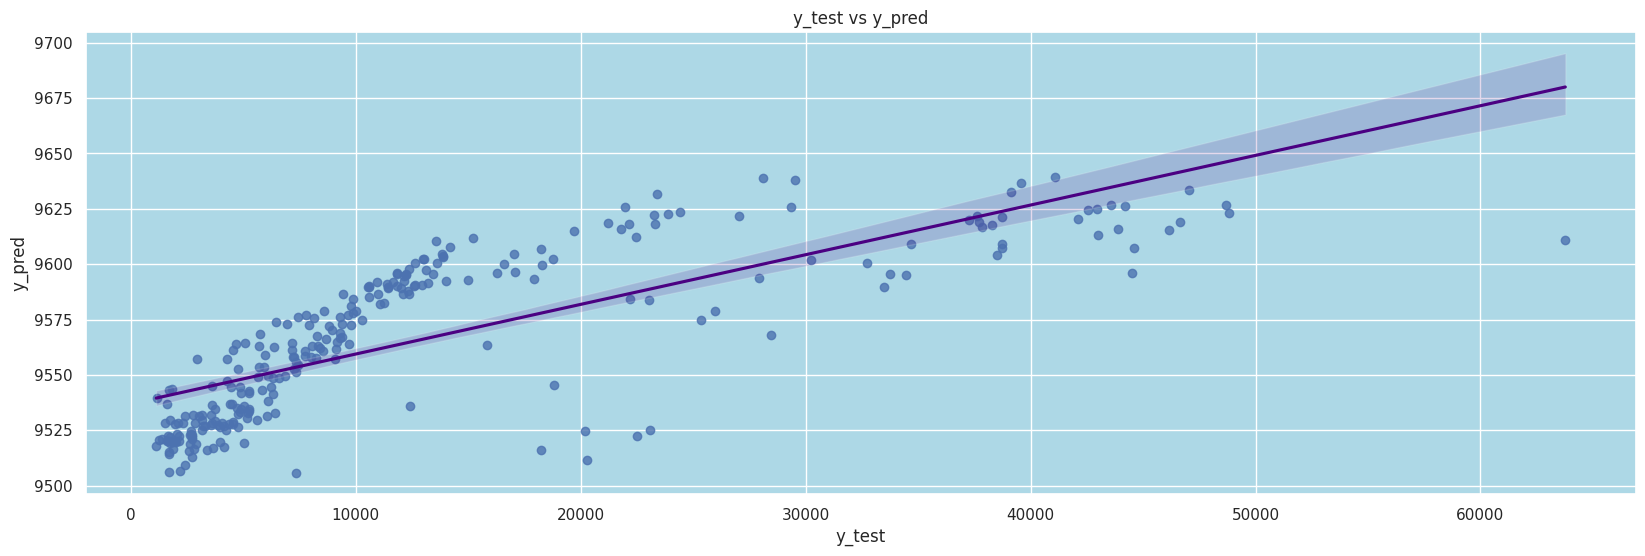

In [279]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'indigo'})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [294]:
datos = pd.read_csv(URL)
datos = datos.rename(columns=dict_columnas)
dict_Sexo = {
    'female': 0,
    'male': 1
}

datos['Sexo'] = datos['Sexo'].map(dict_Sexo)


#Convert 'Smoker' column to numerical using map before creating dummies
dict_Fumador = {
    'no': 0,
    'yes': 1
}

datos['Fumador'] = datos['Fumador'].map(dict_Fumador)
datos= pd.get_dummies(datos, columns=['Region'], drop_first=True)
X = datos_copy_encoded.drop('Cuota', axis=1).values
y = datos_copy_encoded['Cuota'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MAE: 0.11
R2: 0.85


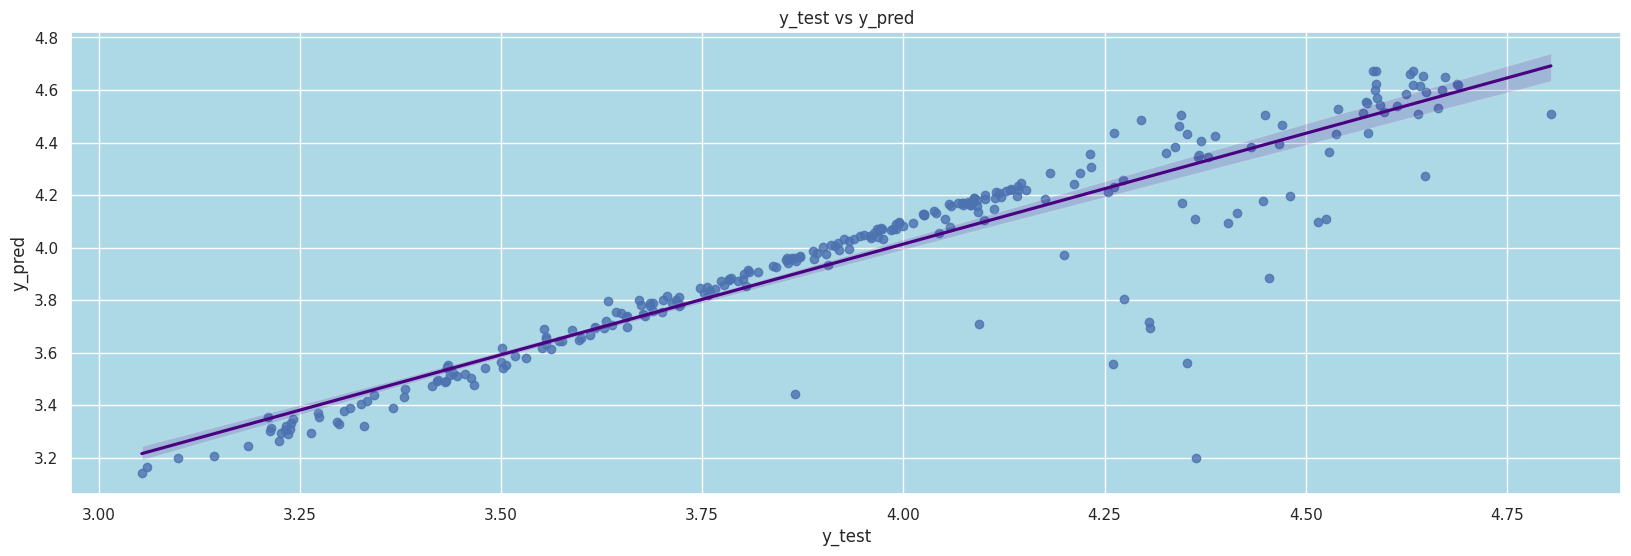

In [295]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'indigo'})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [296]:
from sklearn.tree import DecisionTreeRegressor

In [298]:
datos = pd.read_csv(URL)
datos = datos.rename(columns=dict_columnas)
dict_Sexo = {
    'female': 0,
    'male': 1
}

datos['Sexo'] = datos['Sexo'].map(dict_Sexo)


#Convert 'Smoker' column to numerical using map before creating dummies
dict_Fumador = {
    'no': 0,
    'yes': 1
}

datos['Fumador'] = datos['Fumador'].map(dict_Fumador)
datos= pd.get_dummies(datos, columns=['Region'], drop_first=True)
X = datos_encoded.drop('Cuota', axis=1).values
y = datos_encoded['Cuota'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
y_pred = dtr.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MAE: 2932.76
R2: 0.73


In [299]:
X = datos_copy_encoded.drop('Cuota', axis=1).values
y = datos_copy_encoded['Cuota'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
y_pred = dtr.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MAE: 0.09
R2: 0.78


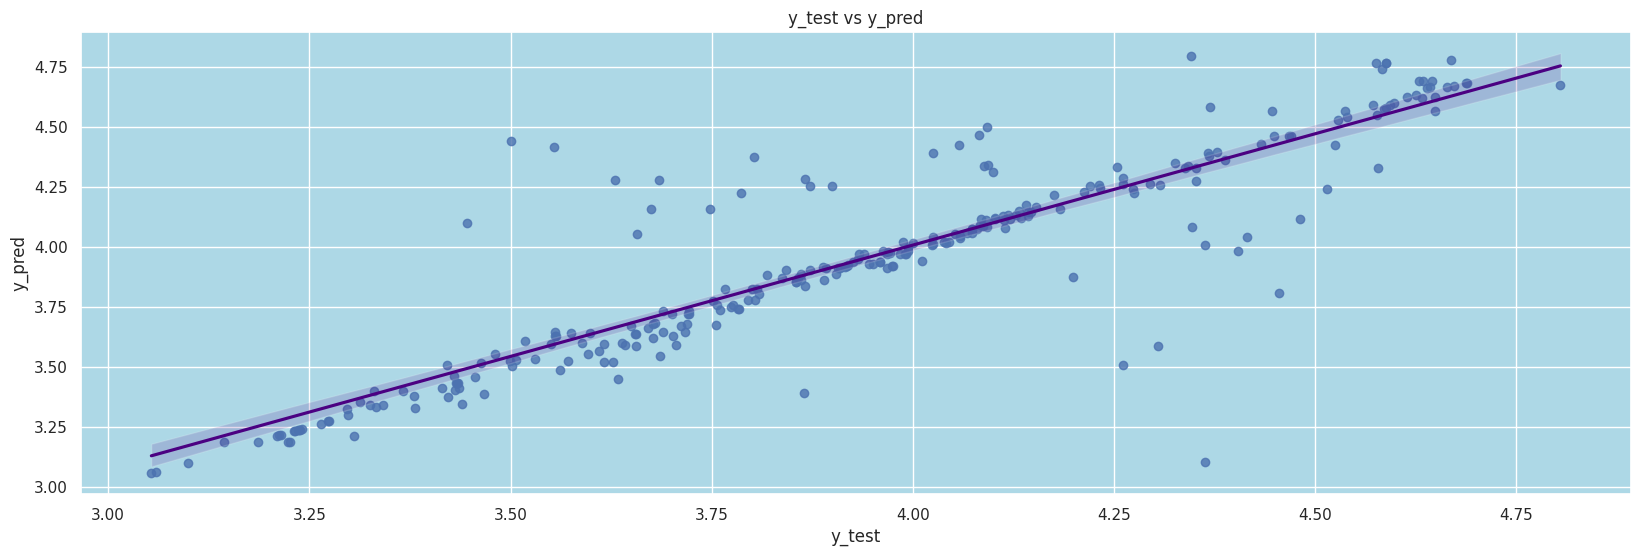

In [300]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue','figure.facecolor':'white'})
plt.figure(figsize=(20,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'indigo'})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()